In [1]:
import datetime as dt
import json
import numpy as np
import pandas as pd
import re
import requests
import tweepy
import time
import matplotlib.pyplot as plt
%matplotlib inline

# Gather

In [2]:
twets = pd.read_csv("twitter-archive-enhanced.csv", encoding = 'utf-8')
tweets = twets.copy()
tweets.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)
    
imag = pd.read_csv('image-predictions.tsv', sep = '\t')
images = imag.copy()
images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
consumer_key = 'XIntz3cf9UBxCUjxlrrVzflmz'
consumer_secret = 'VtiZDrR8j8gbZqCL6zwuzVFGdpICv6KF9j4Jc00kPhvgMQOs1r'
access_token = '741633578354647040-kYHUiXxQoijBCnqK37Io8jPTYiwENhE'
access_secret = 'ibJb8vM3aCMaPz4YcnQxiYVFLcN7omLt7zwm91PrvZ2UG'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [5]:
df = []
errors = []
tweet_id = images['tweet_id']

tweet = api.get_status(tweet_id[1], tweet_mode='extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
for id in tweet_id:
    try:
        tweet = api.get_status(id, tweet_mode='extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
        favorites = tweet['favorite_count'] 
        retweets = tweet['retweet_count'] # Count of the retweet
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count'] 
        date_time = tweet['created_at'] 
        df.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception as e: 
        errors.append(tweet_id)
        print("error : ",e)




Rate limit reached. Sleeping for: 738
error :  [{'code': 144, 'message': 'No status found with that ID.'}]
error :  [{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 737
error :  [{'code': 144, 'message': 'No status found with that ID.'}]
error :  [{'code': 144, 'message': 'No status found with that ID.'}]
error :  [{'code': 144, 'message': 'No status found with that ID.'}]
error :  [{'code': 144, 'message': 'No status found with that ID.'}]
error :  [{'code': 144, 'message': 'No status found with that ID.'}]


In [6]:
df = pd.DataFrame(df, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# Save the dataFrame in file
df.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [7]:
tweet_dat = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_data = tweet_dat.copy()
tweet_data.head(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,666020888022790149,2544,508,7415093,139459,2015-11-15 22:32:08
1,666029285002620928,128,47,7415093,139459,2015-11-15 23:05:30
2,666033412701032449,125,44,7415093,139459,2015-11-15 23:21:54
3,666044226329800704,295,139,7415093,139459,2015-11-16 00:04:52
4,666049248165822465,107,40,7415093,139459,2015-11-16 00:24:50


### Gather: Summary
It is the first step in the data wrangling process.
- Methods used
 - Downloaded csv twitter-archive-enhanced.csv as provided by udacity.
 - Downloaded image-predictions.tsv from internet using requests
 - Got JSON object of all the tweet_ids using Tweepy in tweet_json.txt



# Assess

### Assessing tweets dataframe (twitter-archive-enhanced.csv)

In [8]:
tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1112,733460102733135873,NaN,NaN,2016-05-20 00:51:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hermione. Her face is as old as time. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733460102...,11,10,Hermione,None,None,None,None
213,851591660324737024,NaN,NaN,2017-04-11 00:24:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh jeez u did me quite the spook little fella....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851591660...,11,10,None,None,None,None,None
1998,672538107540070400,NaN,NaN,2015-12-03 22:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Darby. He's a Fiscal Tutankhamen Waxbeard...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672538107...,7,10,Darby,None,None,None,None
850,765719909049503744,NaN,NaN,2016-08-17 01:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brat. He has a hard time being ferocio...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765719909...,12,10,Brat,None,None,None,None


In [9]:
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
tweets['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
tweets['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
tweets.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
tweets.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
an            7
Bailey        7
Toby          7
Daisy         7
Buddy         7
Jack          6
Stanley       6
Scout         6
Rusty         6
Leo           6
Bella         6
Oscar         6
Milo          6
Dave          6
Koda          6
Jax           6
very          5
           ... 
Godzilla      1
Goliath       1
Combo         1
Craig         1
Sundance      1
Lance         1
Tanner        1
Wesley        1
Chuck         1
Amber         1
Champ         1
Pavlov        1
Bloop         1
Rudy          1
Clifford      1
Tove          1
Corey         1
Brandi        1
Ricky         1
Ralphson      1
Pilot         1
Newt          1
Howie         1
Divine        1
Ralf          1
Grey          1
Jarod         1
Bubba         1
Jeffri        1
Beemo         1
Name: name, Length: 957,

In [15]:
# Sort values of 'name' column alphabetically - lowercase values appear at the bottom
tweets.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

#### Any name starting from lowercase is actually not a name like an,such,the,very etc.

In [16]:
(tweets.loc[(tweets['name'].str.islower())]).name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
getting          2
actually         2
mad              2
not              2
infuriating      1
all              1
by               1
old              1
light            1
my               1
his              1
such             1
this             1
incredibly       1
life             1
officially       1
space            1
unacceptable     1
Name: name, dtype: int64

Lets see if these text column actually contains the name of dog in it. Usually the dog name appears after 'named' and 'name is' in text column. So if we check the count of such columns, we can actually get the name of the dog from there.

In [17]:
print("named  ", len(tweets.loc[(tweets['name'].str.islower()) & (tweets['text'].str.contains('named'))]))
print("name is ",len(tweets.loc[(tweets['name'].str.islower()) & (tweets['text'].str.contains('name is'))]))

named   20
name is  2


**One more thing I noticed while I opened csv in excel is that few rows had &amp; instead of '&' in 'text' column**

In [18]:
# row count in tweets which contain '&amp;' instead of '&' in 'text' column
len(tweets[tweets.text.str.contains('&amp;')])

54

### Assessing images dataframe (image-predictions.tsv)

In [19]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1020,710153181850935296,https://pbs.twimg.com/media/Cdr4jO2UAAAIo6W.jpg,2,cowboy_hat,0.979053,False,sombrero,0.010682,False,cocker_spaniel,0.002713,True
971,706593038911545345,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,1,four-poster,0.696423,False,quilt,0.189312,False,pillow,0.029409,False
1049,713761197720473600,https://pbs.twimg.com/media/CefKBOuWIAAIlKD.jpg,1,Brittany_spaniel,0.797936,True,English_springer,0.044718,True,Welsh_springer_spaniel,0.037911,True
734,686947101016735744,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,1,refrigerator,0.799795,False,medicine_chest,0.182538,False,ice_bear,0.001431,False
182,669351434509529089,https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg,1,cuirass,0.756829,False,breastplate,0.233520,False,bulletproof_vest,0.003812,False


In [20]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Assessing tweet_data dataframe (tweet_json.txt)

In [22]:
tweet_data.describe()

,tweet_id,favorites,retweets,user_followers,user_favourites
count,2.068000e+03,2068.000000,2068.000000,2.068000e+03,2068.000000
mean,7.381174e+17,8461.539652,2823.886364,7.415133e+06,139459.017408
std,6.767761e+16,12735.425697,4908.503123,6.548032e+01,0.185822
min,6.660209e+17,0.000000,12.000000,7.415093e+06,139459.000000
25%,6.764377e+17,1611.000000,601.000000,7.415097e+06,139459.000000
50%,7.117137e+17,3726.000000,1329.500000,7.415146e+06,139459.000000
75%,7.931393e+17,10605.500000,3260.250000,7.415147e+06,139459.000000
max,8.924206e+17,165029.000000,84196.000000,7.415806e+06,139461.000000


In [23]:
tweet_data.user_favourites.value_counts()

139459    2050
139461      18
Name: user_favourites, dtype: int64

Note : user_favourites has 2 very close values,which is the information needed to calculate the % of the like by favorites of the user; to see if the number of the folowers or the favorites of the page in general affect the number of the favorites or likes a tweet will get. Since we git this data by querying the API in one date this information has no meaning. Hence , we don't need this.

In [24]:
tweet_data.query('tweet_id == 666020888022790149')

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,666020888022790149,2544,508,7415093,139459,2015-11-15 22:32:08


## Quality
Completeness, Validity, Accuracy, Consistency , i.e. content issues<br><br>
### twitter_archive dataset

- We don't want retweets.
- Erroneous datatypes (timestamp, tweet_id, in_reply_to_status_id, in_reply_to_user_id).
- The numerator and denominator columns have invalid values.
- Extra characters after '&'
- In several columns null objects are non-null (None to NaN).
- Name column have invalid names i.e 'None', 'a', 'an' etc.
- Should change columns type (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id) to string because we'll not be using them for any computation.
- Remove colums like 'retweeted_status_id' , 'retweeted_status_user_id and 'retweeted_status_timestamp' because we don't need them . Also, column date_time we imported from the API, it has the same values as timestamp column , so we don't need that either .
- Sources difficult to read.




### image_predictions dataset
- Tweets with no images (2075 rows instead of 2356)
- Some tweet_ids have the same jpg_url
- Some tweets are have 2 different tweet_id one redirect to the other (Dataset contains retweets)

### tweet_data dataset
- Remove column user_favourites

## Tidiness
Untidy data , i.e. structural issues<br><br>

- Dog "stage" variable in four columns: doggo, floofer, pupper, puppo
- Join 'tweet_data' and 'images' to 'tweets'


# Clean

In [25]:
# we will start by merging our dataframe in one
# the we save the result in file as backup
tweet = pd.merge(tweets, images, how = 'left', on = ['tweet_id'] )
tweet = pd.merge(tweet, tweet_data, how = 'left', on = ['tweet_id'])
tweet.to_csv('df_master.csv', encoding = 'utf-8')
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

## 1.  Define

#### Remove retweets


## Code

In [26]:
tweet = tweet[pd.isnull(tweet.retweeted_status_id)]

## Test

In [27]:
len(tweet[pd.isnull(tweet.retweeted_status_id)])

2175

## 2. Define

####  Remove tweets with no image

## Code

In [30]:
tweet = tweet.dropna(subset = ['jpg_url'])

## Test

In [31]:
len(tweet[pd.isnull(tweet.jpg_url)])

0

## 3. Define

#### Remove duplicates

## Code

In [32]:
tweet = tweet.drop_duplicates()

## Test

In [33]:
len(tweet)

1994

## 4. Define

#### Remove columns that are not required
'retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp' , 'user_favourites' and 'date_time'

## Code

In [34]:
# Delete columns related to retweet we don't need anymore
tweet = tweet.drop(['retweeted_status_id','retweeted_status_user_id' , 'retweeted_status_timestamp' , 'date_time','user_favourites'], 1)

## Test

In [35]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                    

## 5. Define

#### Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 


## Code

In [36]:
tweet['dog_stage'] = tweet['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [37]:
tweet = tweet.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

## Test

In [38]:
tweet.dog_stage.value_counts()

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

## 6. Define

#### Change incorrect dog names. 

## Code

In [39]:
# Save locations where 'name' column is lowercase, lowercase and 'text' column contains 'named' and lowercase and
#'text'column contains the words 'name is'

names = tweet.loc[(tweet['name'].str.islower())]
named = tweet.loc[(tweet['name'].str.islower()) & (tweet['text'].str.contains('named'))]
name_is = tweet.loc[(tweet['name'].str.islower()) & (tweet['text'].str.contains('name is'))]


# Save these locations as lists
names_list = names['text'].tolist()
named_list = named['text'].tolist()
name_is_list = name_is['text'].tolist()

# Iterating through the lists and setting the value of 'name' accordingly

for i in named_list:
    idx = tweets.text == i
    tweet.loc[idx, 'name'] = re.findall(r"named\s(\w+)", i)

for i in name_is_list:
    idx = tweets.text == i
    tweet.loc[idx, 'name'] = re.findall(r"name is\s(\w+)", i)    

for i in names_list:
    idx = tweets.text == i
    tweet.loc[idx, 'name'] = "None"

## Test

In [40]:
tweet.name.sort_values()

1021            Abby
1035            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
367            Alfie
858            Alfie
1616           Alfie
2238           Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
780           Anakin
            ...     
927           Winnie
263           Winnie
407          Winston
1243         Winston
986          Winston
816          Winston
1829         Winston
280          Winston
559          Winston
2133         Winston
877           Wishes
174            Wyatt
410            Wyatt
1451           Wyatt
1378            Yoda
43              Yogi
622          

## 7. Define


#### Correct numerator and denominator columns that have invalid values and are in float. 

## Code

In [41]:
tweet['name'] = tweet['name'].replace('None', np.NaN)

In [42]:
num_den = tweet['text'].str.extract(('(\d+(\.\d+)|(\d+))\/(\d+)'), expand=False)
num_den.columns = ['A','B','C','D']
num_den.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 4 columns):
A    1994 non-null object
B    4 non-null object
C    1990 non-null object
D    1994 non-null object
dtypes: object(4)
memory usage: 77.9+ KB


In [43]:
num_den.A.unique()

array(['13', '12', '14', '13.5', '11', '6', '10', '0', '84', '24', '9.75',
       '5', '11.27', '3', '7', '8', '9', '4', '165', '1776', '204', '50',
       '99', '80', '45', '60', '44', '143', '121', '11.26', '2', '144',
       '88', '1', '420'], dtype=object)

In [44]:
tweet.iloc[num_den[num_den.A =='0'].index.values]['text'].values

array([ 'This is Jimison. He was just called a good boy. 13/10 https://t.co/djMep7mGkV',
       'This is Cassie. She can go from sweet to scary af in a matter of seconds. 10/10 points deducted for cats on pajamas https://t.co/B6dmZmJBdK'], dtype=object)

In [45]:
tweet.iloc[num_den[num_den.A =='1776'].index.values]['text'].values

array([ 'WeRateDogs stickers are here and they\'re 12/10! Use code "puppers" at checkout 🐶🐾\n\nShop now: https://t.co/k5xsufRKYm https://t.co/ShXk46V13r'], dtype=object)

In [46]:
num_den.D.unique()

array(['10', '70', '7', '150', '11', '170', '20', '50', '90', '80', '40',
       '130', '110', '120', '2'], dtype=object)

In [47]:
tweet.iloc[num_den[num_den.D == '170'].index.values]['text'].values

array([ "Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https://t.co/GPaoH5qWEk"], dtype=object)

In [48]:
tweet['rating_numerator'] = num_den.A.astype(float)
tweet['rating_denominator'] = num_den.D.astype(float)

## Test

In [49]:
tweet['rating_numerator'].value_counts()

12.00      450
10.00      419
11.00      396
13.00      261
9.00       151
8.00        95
7.00        52
14.00       35
5.00        32
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
0.00         2
24.00        1
9.75         1
84.00        1
13.50        1
143.00       1
420.00       1
50.00        1
80.00        1
45.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
165.00       1
11.27        1
1776.00      1
99.00        1
121.00       1
204.00       1
Name: rating_numerator, dtype: int64

In [50]:
tweet['rating_denominator'].value_counts()

10.0     1976
50.0        3
80.0        2
11.0        2
130.0       1
170.0       1
150.0       1
2.0         1
120.0       1
110.0       1
40.0        1
90.0        1
20.0        1
7.0         1
70.0        1
Name: rating_denominator, dtype: int64

## 8. Define

#### Remove extra characters after '&' in tweet['text'] column 

## Code

In [51]:
tweet['text'] = tweet['text'].str.replace('&amp;', '&')

## Test

In [52]:
tweet[tweet.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,dog_stage


## 9. Define

#### Make sources readable

## Code

In [53]:
tweet.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [54]:
tweet['source'] = tweet['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

## Test

In [55]:
tweet.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

## 10. Define

#### Change datatypes of required variables

Change datatype of timestamp to datetime and tweet_id, in_reply_to_status_id, and in_reply_to_user_id to strings.

## Code

In [56]:
tweet['timestamp'] = pd.to_datetime(tweet['timestamp'])
tweet['tweet_id'] = tweet['tweet_id'].astype('str')
tweet['in_reply_to_status_id'] = tweet['in_reply_to_status_id'].astype('str')
tweet['in_reply_to_user_id'] = tweet['in_reply_to_user_id'].astype('str')


## Test

In [57]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1350 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                       1994 non-null object
p3_con

## Store

In [58]:
# Save clean DataFrame to csv file
tweet.to_csv('tweet.csv')

# Analyze

In [59]:
tweet.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,bagel,0.085851,False,banana,0.076110,False,38242.0,8376.0,7415114.0,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,Pekinese,0.090647,True,papillon,0.068957,True,32785.0,6184.0,7415114.0,NaN
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,malamute,0.078253,True,kelpie,0.031379,True,24689.0,4092.0,7415114.0,NaN
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,41572.0,8518.0,7415114.0,NaN
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39744.0,9223.0,7415114.0,NaN


In [60]:
tweet.corr()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets,user_followers
rating_numerator,1.000000,0.198443,-0.000303,-0.008700,-0.020487,-0.004757,0.015659,0.017752,0.011553
rating_denominator,0.198443,1.000000,-0.004094,-0.004240,-0.034964,0.007071,-0.027315,-0.020324,-0.010992
img_num,-0.000303,-0.004094,1.000000,0.204406,-0.156773,-0.141409,0.129659,0.103479,0.098684
p1_conf,-0.008700,-0.004240,0.204406,1.000000,-0.509531,-0.707994,0.074294,0.050608,0.042337
p2_conf,-0.020487,-0.034964,-0.156773,-0.509531,1.000000,0.480743,-0.018414,-0.015901,0.029288
p3_conf,-0.004757,0.007071,-0.141409,-0.707994,0.480743,1.000000,-0.050472,-0.041309,-0.029796
favorites,0.015659,-0.027315,0.129659,0.074294,-0.018414,-0.050472,1.000000,0.929772,0.202290
retweets,0.017752,-0.020324,0.103479,0.050608,-0.015901,-0.041309,0.929772,1.000000,0.131415
user_followers,0.011553,-0.010992,0.098684,0.042337,0.029288,-0.029796,0.202290,0.131415,1.000000


<br><br>From the correlation coefficients we can see that retweets and favorites are strongly correlated with coefficient value of 0.929136 . Lets have a look at them graphically.<br>

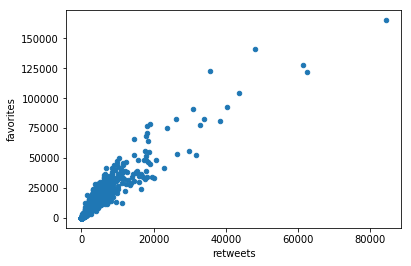

In [61]:
tweet.plot.scatter('retweets', 'favorites')

###  Let us analyze the different dog stages .<br>

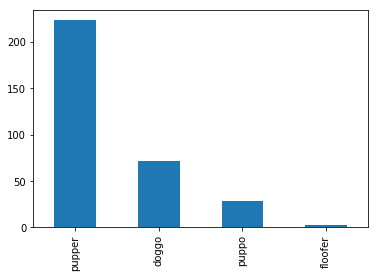

In [62]:
tweet.dog_stage.value_counts().plot(kind = 'bar')

Most dogs are in pupper stage as compared to rest of the stages.

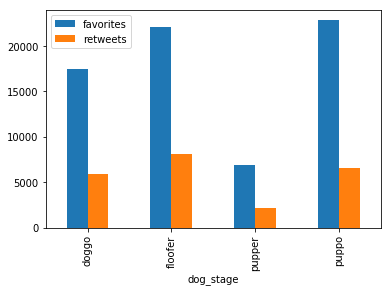

In [63]:
tweet.groupby('dog_stage')['favorites', 'retweets'].mean().plot(kind = 'bar')

**Floofer gets the highest favorites and retweets while pupper gets the highest inspite of having the highest frequency.**

Also, one unique thing about the ratings is that most of them are out of 10 but are still more than than. Lets see how they vary.

In [64]:
tweet.rating_numerator.value_counts()

12.00      450
10.00      419
11.00      396
13.00      261
9.00       151
8.00        95
7.00        52
14.00       35
5.00        32
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
0.00         2
24.00        1
9.75         1
84.00        1
13.50        1
143.00       1
420.00       1
50.00        1
80.00        1
45.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
165.00       1
11.27        1
1776.00      1
99.00        1
121.00       1
204.00       1
Name: rating_numerator, dtype: int64

Text(0,0.5,'numerator')

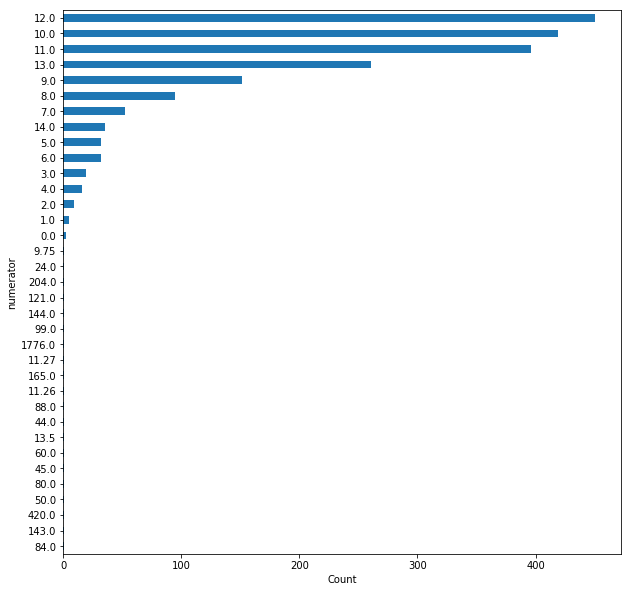

In [65]:
# df_by_breed = tweet.groupby('dog_breed').filter(lambda x: len(x) >= 20)
plt.figure(figsize = (10,10))
ratings = tweet.rating_numerator.value_counts()
ratings.sort_values().plot(kind = 'barh')
plt.xlabel('Count')
plt.ylabel('numerator')

# Conclusion
- From above, we can see that retweets and favorites are strongly related . When favorite tweets increases, number of retweets also increases and vice-versa.
- Most dogs are in pupper stage as compared to rest of the stages. 
- Floofer gets the highest favorites and retweets while pupper gets the highest inspite of having the highest frequency.
- Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "12/10". <br>

WeRateDogs is one of the most followed pages by users on twitter if one is looking for dog photos. Moreover, they revies dogs with really great ratings and witty comments that will definitely light up the reader ,specially the owner of the dog .